In [5]:
from sympy import *
import networkx as nx
import itertools

# 2D Rigidity (from lecture, as a reference)

In [160]:
configuration2 = nx.DiGraph()
p1 = Point(0,0)
p2 = Point(5,0)
p3 = Point(5,5)
p4 = Point(0,5)
configuration2.add_edges_from([(p1,p2),(p2,p3),(p3,p4),(p4,p1)])

configuration3 = nx.DiGraph()
p1 = Point(0,0)
p2 = Point(5,0)
p3 = Point(5,5)
p4 = Point(0,5)
configuration3.add_edges_from([(p1,p2),(p2,p3),(p3,p4),(p4,p1),(p1,p3)])

In [56]:
def graph2d_to_matrix(G):
    M = Matrix()
    for edge in G.edges:
        row = []
        for vertex in G.nodes:
            if vertex == edge[0]:
                row.extend([edge[0].x-edge[1].x, edge[0].y-edge[1].y])
            elif vertex == edge[1]:
                row.extend([edge[1].x-edge[0].x, edge[1].y-edge[0].y])
            else:
                row.extend([0,0])
        M=Matrix([M,row])
    return M

In [157]:
def set_pinning2d(pins, M):
    if type(M) is Matrix: M = M.nullspace()
    if type(pins) is int: pins = {pins}
    for p in pins:
        for vector in M:
            if vector[2*(p-1)] != 0 or vector[2*(p-1)+1] != 0:
                for i in Range(vector.rows):
                    vector[i] = 0
    return M

In [57]:
graph2d_to_matrix(configuration2)

Matrix([
[-5,  0, 5,  0, 0, 0,  0, 0],
[ 0,  0, 0, -5, 0, 5,  0, 0],
[ 0,  0, 0,  0, 5, 0, -5, 0],
[ 0, -5, 0,  0, 0, 0,  0, 5]])

In [161]:
pprint(graph2d_to_matrix(configuration3).nullspace())

⎡⎡1⎤  ⎡1⎤  ⎡-1⎤⎤
⎢⎢ ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢1 ⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎢⎢1⎥  ⎢1⎥  ⎢-1⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎢⎢1⎥  ⎢0⎥  ⎢0 ⎥⎥
⎢⎢ ⎥, ⎢ ⎥, ⎢  ⎥⎥
⎢⎢0⎥  ⎢1⎥  ⎢0 ⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎢⎢1⎥  ⎢0⎥  ⎢0 ⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎢⎢0⎥  ⎢1⎥  ⎢0 ⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎣⎣0⎦  ⎣0⎦  ⎣1 ⎦⎦


In [162]:
pprint(set_pinning2d({1,2}, graph2d_to_matrix(configuration3)))

⎡⎡0⎤  ⎡0⎤  ⎡0⎤⎤
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥, ⎢ ⎥, ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎣⎣0⎦  ⎣0⎦  ⎣0⎦⎦


In [58]:
print("is rigid" if check_rigidity(graph2d_to_matrix(configuration2)) else "is flexible")
print(graph2d_to_matrix(configuration2).rank(), graph2d_to_matrix(configuration2).cols)

is flexible
4 8


In [62]:
def getMotions(M):
    if type(M) is Matrix: M = M.nullspace()
    motions = list()
    i= 0
    for vector in M:
        j = 0
        equation = list()
        for val in vector:
            if val != 0: equation.append(str(val) + "*v" + str(floor(j/2)+1) + ("x" if (j%2 == 0) else "y"))
            j+=1
        motions.append(equation)
    return motions

In [63]:
def motions_to_string(motions):
    string = ""
    for v in motions:
        if len(v) !=0:
            for val in v:
                if val == v[0] and len(v)>1: word = " depends on "
                elif val != v[len(v)-1]: word = ", and "
                elif len(v) == 1: word = " is free\n"
                else: word ="\n"
                string += val + word
    return string

In [64]:
getMotions(graph2d_to_matrix(configuration2))

[['1*v1x', '1*v2x'],
 ['1*v2y', '1*v3y'],
 ['1*v3x', '1*v4x'],
 ['1*v1y', '1*v4y']]

In [65]:
motions_to_string(getMotions(graph2d_to_matrix(configuration2)))

'1*v1x depends on 1*v2x\n1*v2y depends on 1*v3y\n1*v3x depends on 1*v4x\n1*v1y depends on 1*v4y\n'

# 3D rigidity

In [76]:
b0 = Point(0,0,0)
b1 = Point(0,1,0)
b2 = Point(1,1,0)
b3 = Point(1,0,0)

t0 = Point(0,0,1)
t1 = Point(0,1,1)
t2 = Point(1,1,1)
t3 = Point(1,0,1)

cube = nx.DiGraph()
cube.add_edges_from([(b0,b1),(b1,t1),(t1,t0),(t0,b0),(b0,t1),(b1,t0),
                     (b1,b2),(b2,t2),(t2,t1),(t1,b1),(b1,t2),(b2,t1),
                     (b2,b3),(b3,t3),(t3,t2),(t2,b2),(b2,t3),(b3,t2),
                     (b0,b3),(b3,t3),(t3,t0),(t0,b0),(b0,t3),(b3,t0),
                     (b0,b1),(b1,b2),(b2,b3),(b3,b0),(b0,b2),(b1,b3),
                     (t0,t1),(t1,t2),(t2,t3),(t3,t0),(t0,t2),(t1,t3),])

cubem1 = nx.DiGraph()
cubem1.add_edges_from([(b0,b1),(b1,t1),(t1,t0),(t0,b0),(b0,t1),(b1,t0),
                     (b1,b2),(b2,t2),(t2,t1),(t1,b1),(b1,t2),(b2,t1),
                     (b2,b3),(b3,t3),(t3,t2),(t2,b2),(b2,t3),(b3,t2),
                     (b0,b3),(b3,t3),(t3,t0),(t0,b0),(b0,t3),(b3,t0),
                     (b0,b1),(b1,b2),(b2,b3),(b3,b0),(b0,b2),(b1,b3),])

cubem2 = nx.DiGraph()
cubem2.add_edges_from([
                     (b0,b1),(b1,b2),(b2,b3),(b3,b0),(b0,b2),(b1,b3),
                     (b0,b1),(b1,t1),(t1,t0),(t0,b0),(b0,t1),(b1,t0),
                     (b1,b2),(b2,t2),(t2,t1),(t1,b1),(b1,t2),(b2,t1),
                     (b2,b3),(b3,t3),(t3,t2),(t2,b2),(b2,t3),(b3,t2),])

cube_corner = nx.DiGraph()
cube_corner.add_edges_from([(b0,b1),(b1,b2),(b2,b3),(b3,b0),(b1,b3),(b0,b2),
                     (b0,b1),(b1,t1),(t1,t0),(t0,b0),(b0,t1),(b1,t0),
                     (b0,b3),(b3,t3),(t3,t0),(t0,b0),(b0,t3),(b3,t0),])
cubem3 = cube_corner
    
hinge2 = nx.DiGraph()
hinge2.add_edges_from([(b1,b2),(b2,t2),(t2,t1),(t1,b1),(b1,t2),(b2,t1),
                     (b2,b3),(b3,t3),(t3,t2),(t2,b2),(b2,t3),(b3,t2),])

hinge3 = nx.DiGraph()
hinge3.add_edges_from([
                     (b0,b1),(b1,t1),(t1,t0),(t0,b0),(b0,t1),(b1,t0),
                     (b1,b2),(b2,t2),(t2,t1),(t1,b1),(b1,t2),(b2,t1),
                     (b2,b3),(b3,t3),(t3,t2),(t2,b2),(b2,t3),(b3,t2),])
cubem4 = hinge

ring = nx.DiGraph()
ring.add_edges_from([(b0,b1),(b1,t1),(t1,t0),(t0,b0),(b0,t1),(b1,t0),
                     (b0,b3),(b3,t3),(t3,t0),(t0,b0),(b0,t3),(b3,t0),
                     (b1,b2),(b2,t2),(t2,t1),(t1,b1),(b1,t2),(b2,t1),
                     (b2,b3),(b3,t3),(t3,t2),(t2,b2),(b2,t3),(b3,t2),])

In [69]:
def graph3d_to_matrix(G):
    M = Matrix()
    for edge in G.edges:
        row = []
        for vertex in G.nodes:
            if vertex == edge[0]:
                row.extend([edge[0].x-edge[1].x, edge[0].y-edge[1].y, edge[0].z-edge[1].z])
            elif vertex == edge[1]:
                row.extend([edge[1].x-edge[0].x, edge[1].y-edge[0].y, edge[1].z-edge[0].z])
            else:
                row.extend([0,0,0])
        M=Matrix([M,row])
    return M

In [70]:
def set_pinning(pins, M):
    if type(M) is Matrix: M = M.nullspace()
    if type(pins) is int: pins = {pins}
    for p in pins:
        for vector in M:
            if vector[2*(p-1)] != 0 or vector[2*(p-1)+1] != 0 or vector[2*(p-1)+2]:
                for i in Range(vector.rows):
                    vector[i] = 0
    return M

In [71]:
def check_rigidity(M):
    return M.rank() >= M.cols-3
def check_3d_rigidity(M):
    return M.rank() >= M.cols-6

In [84]:
def tell(M):
    return "is rigid" if check_3d_rigidity(M) else "is flexible"

In [51]:
pprint(graph3d_to_matrix(cube))
pprint(graph3d_to_matrix(ring))
pprint(graph3d_to_matrix(hinge2))
pprint(graph3d_to_matrix(hinge3))

⎡0   1   -1  0   -1  1   0   0  0   0  0   0   0   0⎤
⎢                                                   ⎥
⎢1   0   -1  0   0   -1  0   1  0   0  0   0   0   0⎥
⎢                                                   ⎥
⎢0   -1  -1  0   0   0   0   0  1   1  0   0   0   0⎥
⎢                                                   ⎥
⎢-1  0   -1  0   0   0   0   0  0   1  0   1   0   0⎥
⎢                                                   ⎥
⎢0   0   1   -1  0   -1  1   0  0   0  0   0   0   0⎥
⎢                                                   ⎥
⎢0   0   0   0   -1  -1  0   1  1   0  0   0   0   0⎥
⎢                                                   ⎥
⎢0   0   0   0   0   0   -1  1  0   1  -1  0   0   0⎥
⎢                                                   ⎥
⎢0   0   -1  -1  0   0   0   0  0   1  1   0   0   0⎥
⎢                                                   ⎥
⎢0   0   0   -1  -1  0   0   0  0   0  0   0   1   1⎥
⎢                                                   ⎥
⎢0   0   0   0   -1  0   -1 

In [53]:
pprint(graph3d_to_matrix(cube).nullspace())
pprint(graph3d_to_matrix(ring).nullspace())
pprint(graph3d_to_matrix(hinge2).nullspace())
pprint(graph3d_to_matrix(hinge3).nullspace())

⎡⎡0 ⎤  ⎡1⎤⎤
⎢⎢  ⎥  ⎢ ⎥⎥
⎢⎢0 ⎥  ⎢1⎥⎥
⎢⎢  ⎥  ⎢ ⎥⎥
⎢⎢0 ⎥  ⎢1⎥⎥
⎢⎢  ⎥  ⎢ ⎥⎥
⎢⎢-1⎥  ⎢2⎥⎥
⎢⎢  ⎥  ⎢ ⎥⎥
⎢⎢1 ⎥  ⎢0⎥⎥
⎢⎢  ⎥  ⎢ ⎥⎥
⎢⎢1 ⎥  ⎢0⎥⎥
⎢⎢  ⎥  ⎢ ⎥⎥
⎢⎢0 ⎥  ⎢1⎥⎥
⎢⎢  ⎥, ⎢ ⎥⎥
⎢⎢1 ⎥  ⎢0⎥⎥
⎢⎢  ⎥  ⎢ ⎥⎥
⎢⎢1 ⎥  ⎢0⎥⎥
⎢⎢  ⎥  ⎢ ⎥⎥
⎢⎢-1⎥  ⎢2⎥⎥
⎢⎢  ⎥  ⎢ ⎥⎥
⎢⎢0 ⎥  ⎢1⎥⎥
⎢⎢  ⎥  ⎢ ⎥⎥
⎢⎢1 ⎥  ⎢0⎥⎥
⎢⎢  ⎥  ⎢ ⎥⎥
⎢⎢0 ⎥  ⎢1⎥⎥
⎢⎢  ⎥  ⎢ ⎥⎥
⎣⎣0 ⎦  ⎣1⎦⎦
⎡⎡1/2 ⎤  ⎡-1/2⎤  ⎡0⎤  ⎡0⎤  ⎡1 ⎤  ⎡0⎤⎤
⎢⎢    ⎥  ⎢    ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥⎥
⎢⎢-1/2⎥  ⎢1/2 ⎥  ⎢0⎥  ⎢1⎥  ⎢0 ⎥  ⎢0⎥⎥
⎢⎢    ⎥  ⎢    ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥⎥
⎢⎢ -1 ⎥  ⎢ 1  ⎥  ⎢1⎥  ⎢0⎥  ⎢0 ⎥  ⎢0⎥⎥
⎢⎢    ⎥  ⎢    ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥⎥
⎢⎢ 1  ⎥  ⎢ 0  ⎥  ⎢0⎥  ⎢0⎥  ⎢0 ⎥  ⎢0⎥⎥
⎢⎢    ⎥  ⎢    ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥⎥
⎢⎢ 0  ⎥  ⎢ 1  ⎥  ⎢0⎥  ⎢1⎥  ⎢-1⎥  ⎢0⎥⎥
⎢⎢    ⎥, ⎢    ⎥, ⎢ ⎥, ⎢ ⎥, ⎢  ⎥, ⎢ ⎥⎥
⎢⎢ 0  ⎥  ⎢ 1  ⎥  ⎢0⎥  ⎢0⎥  ⎢0 ⎥  ⎢0⎥⎥
⎢⎢    ⎥  ⎢    ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥⎥
⎢⎢ 0  ⎥  ⎢ 0  ⎥  ⎢1⎥  ⎢0⎥  ⎢0 ⎥  ⎢0⎥⎥
⎢⎢    ⎥  ⎢    ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥⎥
⎢⎢ 0  ⎥  ⎢ 0  ⎥  ⎢0⎥  ⎢1⎥  ⎢0 ⎥  ⎢0⎥⎥
⎢⎢    ⎥  ⎢    ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥⎥
⎢⎢ 0  ⎥  ⎢ 0  ⎥  ⎢0⎥  ⎢0⎥  ⎢1 ⎥  ⎢0⎥⎥
⎢⎢    ⎥  ⎢    ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  

In [54]:
pprint(graph3d_to_matrix(cube).rref())
pprint(graph3d_to_matrix(ring).rref())
pprint(graph3d_to_matrix(hinge2).rref())
pprint(graph3d_to_matrix(hinge3).rref())

⎛⎡1  0  0  0  0  0  0  0  0  0  0  0   0  -1⎤                                 
⎜⎢                                          ⎥                                 
⎜⎢0  1  0  0  0  0  0  0  0  0  0  0   0  -1⎥                                 
⎜⎢                                          ⎥                                 
⎜⎢0  0  1  0  0  0  0  0  0  0  0  0   0  -1⎥                                 
⎜⎢                                          ⎥                                 
⎜⎢0  0  0  1  0  0  0  0  0  0  0  1   0  -2⎥                                 
⎜⎢                                          ⎥                                 
⎜⎢0  0  0  0  1  0  0  0  0  0  0  -1  0  0 ⎥                                 
⎜⎢                                          ⎥                                 
⎜⎢0  0  0  0  0  1  0  0  0  0  0  -1  0  0 ⎥                                 
⎜⎢                                          ⎥, (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 
⎜⎢0  0  0  0  0  0  1  0  0  0  0  0   0  -1⎥       

In [56]:
pprint(set_pinning({1,2},graph3d_to_matrix(cube)))
pprint(set_pinning({1,2},graph3d_to_matrix(ring)))
pprint(set_pinning({1,2},graph3d_to_matrix(hinge2)))
pprint(set_pinning({1,2},graph3d_to_matrix(hinge3)))

⎡⎡0⎤  ⎡0⎤⎤
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥, ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎣⎣0⎦  ⎣0⎦⎦
⎡⎡0⎤  ⎡0⎤  ⎡0⎤  ⎡0⎤  ⎡0⎤  ⎡0⎤⎤
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎣⎣0⎦  ⎣0⎦  ⎣0⎦  ⎣0⎦  ⎣0⎦  ⎣1⎦⎦
⎡⎡0⎤  ⎡0⎤  ⎡0⎤  ⎡0⎤  ⎡0⎤  ⎡0⎤  ⎡0⎤⎤
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  

In [89]:
print("SHOULD BE RIGID:")
print(graph3d_to_matrix(cube).rank(), graph3d_to_matrix(cube).cols)
print("cube", tell(graph3d_to_matrix(cube)))
print(graph3d_to_matrix(cubem1).rank(), graph3d_to_matrix(cubem1).cols)
print("cubem1", tell(graph3d_to_matrix(cubem1)))
print(graph3d_to_matrix(cubem2).rank(), graph3d_to_matrix(cubem2).cols)
print("cubem2", tell(graph3d_to_matrix(cubem2)))
print(graph3d_to_matrix(cubem3).rank(), graph3d_to_matrix(cubem3).cols)
print("cubem3", tell(graph3d_to_matrix(cubem3)))
print("\nSHOULD BE FLEXIBLE:")
print(graph3d_to_matrix(ring).rank(), graph3d_to_matrix(ring).cols)
print("ring", tell(graph3d_to_matrix(ring)))
print(graph3d_to_matrix(hinge3).rank(), graph3d_to_matrix(hinge3).cols)
print("hinge3", tell(graph3d_to_matrix(hinge3)))
print(graph3d_to_matrix(hinge2).rank(), graph3d_to_matrix(hinge2).cols)
print("hinge2", tell(graph3d_to_matrix(hinge2)))

SHOULD BE RIGID:
18 24
cube is rigid
17 24
cubem1 is flexible
15 24
cubem2 is flexible
12 21
cubem3 is flexible

SHOULD BE FLEXIBLE:
16 24
ring is flexible
13 24
hinge3 is flexible
9 18
hinge2 is flexible


In [85]:
print(tell(graph3d_to_matrix(cubem1)))
print(tell(graph3d_to_matrix(cubem2)))
print(tell(graph3d_to_matrix(cubem3)))
print(tell(graph3d_to_matrix(ring)))
print(tell(graph3d_to_matrix(hinge3)))
print(tell(graph3d_to_matrix(hinge2)))

is rigid
is flexible
is flexible
is flexible
is flexible
is flexible
is flexible


Functions for automatic conversion:

In [32]:
def plates_to_graph(plates):
    graph = nx.Graph()
    for plate in plates:
        edges = plate_to_edgelist(plate)
        graph.add_edges_from(edges)
    return graph
    
# PLate: list of corners in 3d space
    
def plate_to_edgelist(plate):
    edges = []
    for i, edge in enumerate(itertools.combinations(plate, 2)):
        edges.append(edge)
    return edges

In [33]:
mygraph = plates_to_graph([[b0,b1,b2,b3],[t0,t1,t2,t3],[b1,b2,t2,t1],[b0,b3,t3,t0]])
mygraph

## Troubleshooting with visualisation

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [61]:
%matplotlib notebook

In [57]:
def plot_graph(_graph):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter([x.x for x in _graph.nodes],
               [x.y for x in _graph.nodes],
               [x.z for x in _graph.nodes])
    for edge in _graph.edges:
        ax.plot([edge[0].x,edge[1].x], [edge[0].y,edge[1].y], [edge[0].z,edge[1].z])
    plt.show()

<IPython.core.display.Javascript object>


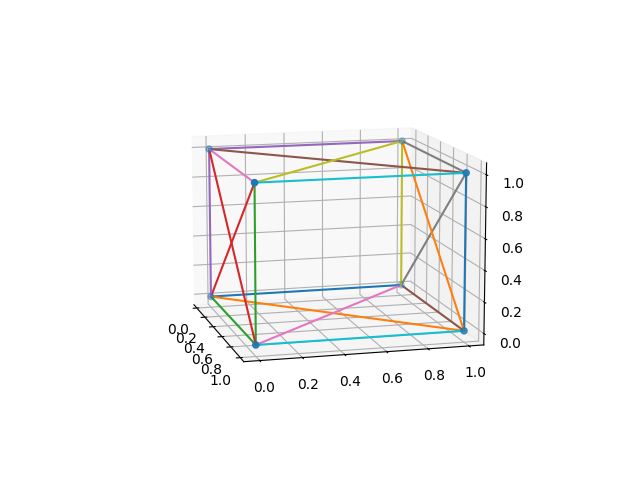

In [62]:
plot_graph(mygraph)

cube


<IPython.core.display.Javascript object>


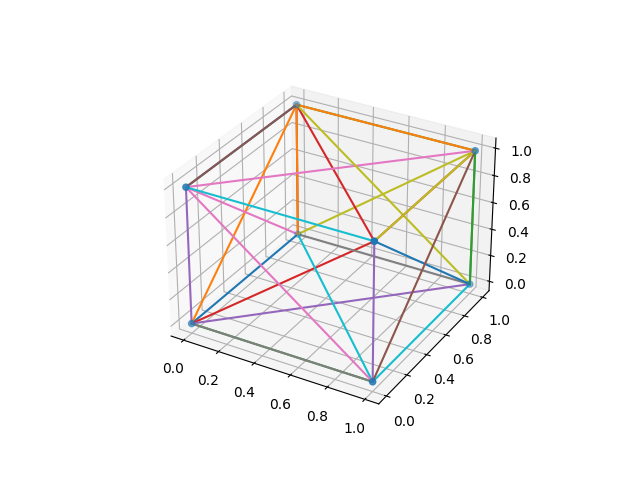

cubem1


<IPython.core.display.Javascript object>


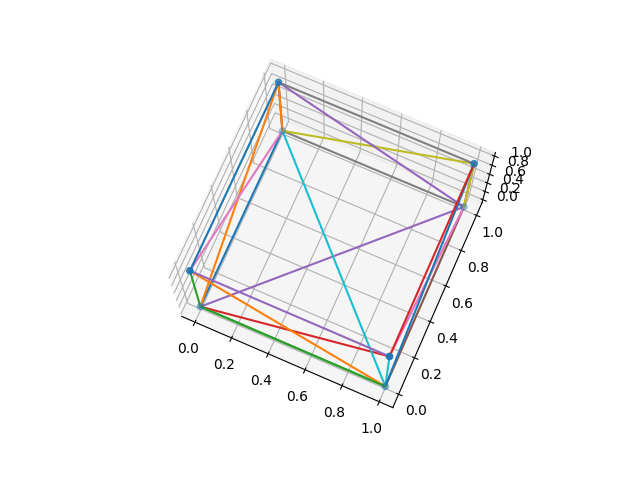

cubem2


<IPython.core.display.Javascript object>


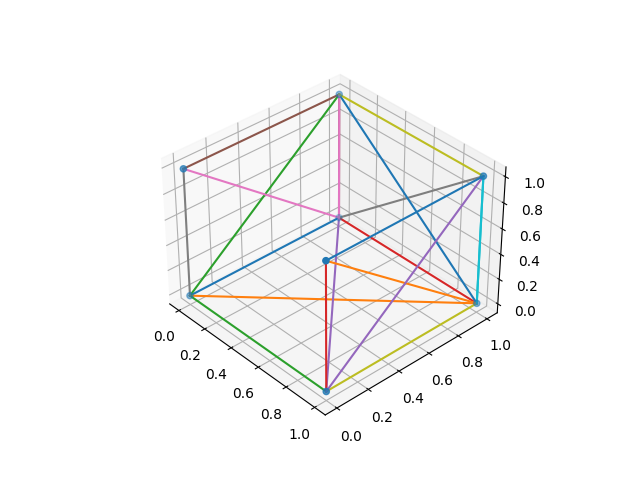

cubem3


<IPython.core.display.Javascript object>


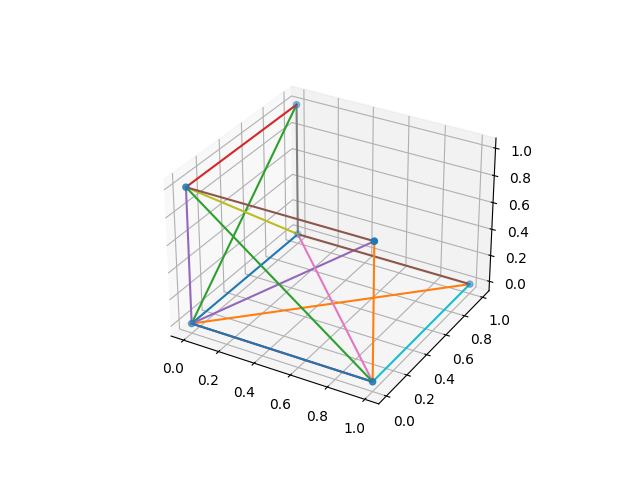

ring


<IPython.core.display.Javascript object>


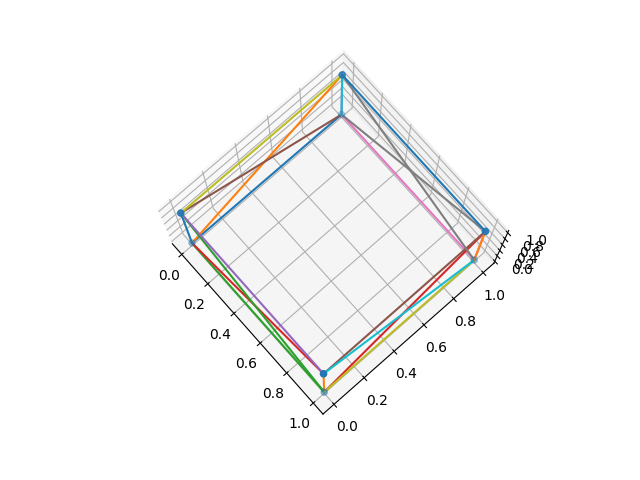

In [68]:
for tag, graph in zip(["cube", "cubem1", "cubem2", "cubem3", "ring"],[cube, cubem1, cubem2, cubem3, ring]):
    print(tag)
    plot_graph(graph)

## Troubleshooting with pinning 
Trying to get more insights why it fails

In [216]:
len(cube.to_undirected().edges)

24

In [215]:
len(cube.edges)

30

In [19]:
def set_pinning_3d(pins, M):
    if type(M) is Matrix: M = M.nullspace()
    if type(pins) is int: pins = {pins}
    for p in pins:
        for vector in M:
            if vector[3*(p-1)] != 0 or vector[3*(p-1)+1] != 0 or vector[3*(p-1)+2] != 0:
                for i in Range(vector.rows):
                    vector[i] = 0
    return M

In [102]:
pprint(graph3d_to_matrix(cube).rref())

⎛⎡1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   0  0  -1  0   0  0   0   0 
⎜⎢                                                                            
⎜⎢0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  -1  0  0  0   -1  0  1   0   0 
⎜⎢                                                                            
⎜⎢0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0   0  0  1   0   0  -1  0   -1
⎜⎢                                                                            
⎜⎢0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  -1  0  0  -1  0   0  1   0   0 
⎜⎢                                                                            
⎜⎢0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  -1  0  0  0   -1  0  1   0   0 
⎜⎢                                                                            
⎜⎢0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0   0  0  1   -1  0  -1  1   -1
⎜⎢                                                                            
⎜⎢0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  -1  0

In [103]:
pprint(graph3d_to_matrix(cubem1).rref())

⎛⎡1  0  0  0  0  0  0  0  0  0  0  0  0   0  0  0   0  0  -1  0   0  0   0   0
⎜⎢                                                                            
⎜⎢0  1  0  0  0  0  0  0  0  0  0  0  -1  0  0  0   0  0  1   -1  0  0   0   0
⎜⎢                                                                            
⎜⎢0  0  1  0  0  0  0  0  0  0  0  0  0   0  0  0   0  0  1   0   0  -1  0   -
⎜⎢                                                                            
⎜⎢0  0  0  1  0  0  0  0  0  0  0  0  -1  0  0  0   0  0  0   0   0  0   0   0
⎜⎢                                                                            
⎜⎢0  0  0  0  1  0  0  0  0  0  0  0  -1  0  0  0   0  0  1   -1  0  0   0   0
⎜⎢                                                                            
⎜⎢0  0  0  0  0  1  0  0  0  0  0  0  1   0  0  -1  0  0  0   -1  0  0   1   -
⎜⎢                                                                            
⎜⎢0  0  0  0  0  0  1  0  0  0  0  0  0   0  0  -1  

In [163]:
pprint(set_pinning_3d({6,7,8}, graph3d_to_matrix(ring)))

⎡⎡0⎤  ⎡1 ⎤  ⎡0⎤  ⎡0⎤  ⎡0⎤  ⎡0⎤  ⎡0⎤  ⎡0⎤⎤
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢1⎥  ⎢1 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢-1⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢1⎥  ⎢1 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢1⎥  ⎢0 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢1⎥  ⎢0 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢-1⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥, ⎢  ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ 

In [203]:
pprint(graph3d_to_matrix(cubem3).nullspace())

⎡⎡0⎤  ⎡0 ⎤  ⎡0⎤  ⎡0⎤  ⎡0⎤  ⎡-1⎤  ⎡1⎤  ⎡0⎤  ⎡1⎤⎤
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0 ⎥  ⎢0⎥  ⎢1⎥  ⎢1⎥  ⎢-1⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢1 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢-1⎥  ⎢0⎥  ⎢1⎥  ⎢1⎥  ⎢-2⎥  ⎢1⎥  ⎢0⎥  ⎢1⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0 ⎥  ⎢0⎥  ⎢1⎥  ⎢1⎥  ⎢-1⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0 ⎥  ⎢0⎥  ⎢1⎥  ⎢0⎥  ⎢0 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢-1⎥  ⎢0⎥  ⎢1⎥  ⎢1⎥  ⎢-2⎥  ⎢1⎥  ⎢0⎥  ⎢1⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢1 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢1⎥  ⎢0 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0 ⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢-1⎥  ⎢1⎥  ⎢0⎥  ⎢1⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥, ⎢1 ⎥, ⎢0⎥, ⎢0⎥, ⎢0⎥, ⎢0 ⎥, ⎢0⎥, ⎢0

In [129]:
def nonempty_nullspace(M):
    """Returns 0 if nullspace is zero, and count of non-zero vectors otherwise"""
    count = 0
    for vector in M:
        if sum([1 for x in vector if x != 0]) != 0:
            count += 1
    return count
        #pprint(vector)

In [20]:
def nonempty_pinning(M):
    """
    Attention, maybe bugs in here, result for cubem3 and ring are wrong,
    but may also be a wrong general assumption.
    
    Should return true if there exists a 3-pinning that results in a non-empty nullspace, i.e. flexibility
    """
    combs = list(itertools.combinations([x+1 for x in range(M.cols//3)], 3))
    #my_perms = list(filter(lambda y: len(y) == 3, perms))
    #print(combs)
    for comb in combs:
        M = set_pinning_3d(comb, M)
        count = 0
        for vector in M:
            if sum([1 for x in vector if x != 0]) != 0:
                count += 1
        if count != 0:
            return True
    return False

In [23]:
print(nonempty_pinning(graph3d_to_matrix(cubem1)))
print(nonempty_pinning(graph3d_to_matrix(cubem2)))
print(nonempty_pinning(graph3d_to_matrix(cubem3)))
print(nonempty_pinning(graph3d_to_matrix(cubem4)))
print(nonempty_pinning(graph3d_to_matrix(ring)))

False
False
True
True
False


In [224]:
pprint(graph3d_to_matrix(cubem3.to_undirected()).cols)

21


In [222]:
pprint(graph3d_to_matrix(cube.to_undirected()).cols)

24


In [205]:
print(nonempty_nullspace(set_pinning_3d({1,2,3}, graph3d_to_matrix(cube))))
print(nonempty_nullspace(set_pinning_3d({1,2,3}, graph3d_to_matrix(cubem1))))
print(nonempty_nullspace(set_pinning_3d({6,7,8}, graph3d_to_matrix(cubem1))))
print(nonempty_nullspace(set_pinning_3d({1,2,3}, graph3d_to_matrix(cubem2))))
print(nonempty_nullspace(set_pinning_3d({6,7,8}, graph3d_to_matrix(cubem2))))
print("-----")
print(nonempty_nullspace(set_pinning_3d({1,2,3}, graph3d_to_matrix(cubem3))))
print(nonempty_nullspace(set_pinning_3d({3,5,7}, graph3d_to_matrix(cubem3))))
print(nonempty_nullspace(set_pinning_3d({1,2,3}, graph3d_to_matrix(cubem4))))
print(nonempty_nullspace(set_pinning_3d({1,2,6}, graph3d_to_matrix(ring))))
print(nonempty_nullspace(set_pinning_3d({6,7,8}, graph3d_to_matrix(ring))))
print("------------")
#print(nonempty_nullspace(set_pinning_3d({1,2,3}, graph3d_to_matrix(cube.to_undirected()))))
#print(nonempty_nullspace(set_pinning_3d({1,2,3}, graph3d_to_matrix(cubem1.to_undirected()))))
#print(nonempty_nullspace(set_pinning_3d({1,2,3}, graph3d_to_matrix(cubem2.to_undirected()))))
#print(nonempty_nullspace(set_pinning_3d({1,2,3}, graph3d_to_matrix(cubem3.to_undirected()))))
#print(nonempty_nullspace(set_pinning_3d({1,2,3}, graph3d_to_matrix(cubem4.to_undirected()))))
#print(nonempty_nullspace(set_pinning_3d({1,2,3}, graph3d_to_matrix(ring.to_undirected()))))
print("------------")
print(graph3d_to_matrix(cube.to_undirected()).rank())
print(graph3d_to_matrix(cubem1.to_undirected()).rank())
print(graph3d_to_matrix(cubem2.to_undirected()).rank())
print(graph3d_to_matrix(cubem3.to_undirected()).rank())
print(graph3d_to_matrix(ring.to_undirected()).rank())

0
0
1
0
2
-----
2
0
3
0
2
------------
------------
18
17
16
12
16


## Preparation for real objects
Fails due to the coffeemug object in kyub which is not exported with the file

In [14]:
import pywavefront

In [16]:
scene = pywavefront.Wavefront('Downloads/KYUB twilight stilton.obj')

PywavefrontException: Unknown material: 5a58d6d54b83c20e84cde3d3/coffeemug